In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

In [27]:
df=pd.read_csv("Gold_price.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [29]:
df['Date']=pd.to_datetime(df['Date'])
sd=df.Date.min()
ed=df.Date.max()

In [30]:
print("The dataframe has privce of gold from ", sd,'to',ed)
print("Total days =",(ed-sd).days)

The dataframe has privce of gold from  2011-12-15 00:00:00 to 2018-12-31 00:00:00
Total days = 2573


In [31]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


<AxesSubplot:>

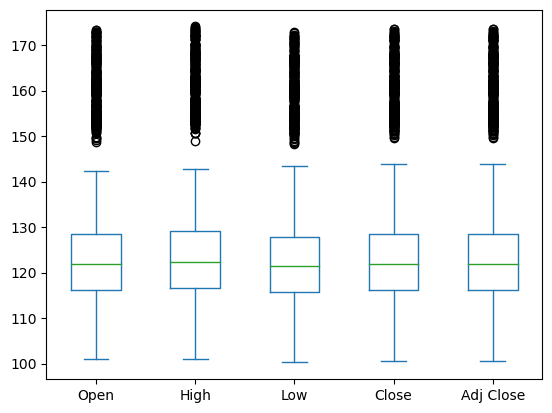

In [32]:
df[['Open','High','Low','Close','Adj Close']].plot(kind ='box')

In [33]:
layout=go.Layout(
    title ='Price of Gold',
    xaxis=dict(title='Date',
               titlefont=dict(family='Courier New,monospace',
                             size=18,
                             color="#CA2F0E"
                             )
              ),
    yaxis=dict(
        title='Price',
               titlefont=dict(family='Courier New,monospace',
                             size=18,
                             color="#CA2F0E"
                             )
              )
)
Gold= [{'x': df['Date'], 'y': df['Close']}]
plot=go.Figure(data=Gold,layout=layout)

In [34]:
iplot(plot)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [44]:
X=np.array(df.index).reshape(-1,1)
Y=df['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [45]:
scaler=StandardScaler().fit(X_train)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [62]:
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
Gold=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=Gold,layout=layout)

In [63]:
iplot(plot2)

In [59]:
from sklearn.metrics import r2_score, mean_squared_error

scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mean_squared_error(Y_train, lm.predict(X_train))}\t{mean_squared_error(Y_test, lm.predict(X_test))}
'''
print(scores)



Metric           Train                Test        
r2_score  0.45416921428275203	0.46742423014232626
MSE       163.76676511603287	172.74236656332576

